In [7]:
import numpy as np
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn import tree

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [8]:
data = pd.read_csv("C:\\Users\Hannah\Desktop\Research Project\data.csv")
data = data.drop(["Unnamed: 32", "id"],1)
#includes all features from columns also floats and normalizes them

X = data.values[:,1:-1].astype('float64')
X = (X - np.mean(X, axis =0)) /  np.std(X, axis = 0)
X = np.hstack([np.ones((X.shape[0], 1)),X]) #adds bias column and arrays data into vectors for quicker calculations
X = MinMaxScaler().fit_transform(X)
Y = data["diagnosis"].map({'M':1,'B':0})
Y = np.array(Y)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

rfc =RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
list(zip(data[data.columns[1:30]], rfc.feature_importances_))

[('radius_mean', 0.0),
 ('texture_mean', 0.014218825834565477),
 ('perimeter_mean', 0.0071787951403496763),
 ('area_mean', 0.12891743388939739),
 ('smoothness_mean', 0.007110080791888157),
 ('compactness_mean', 0.0045247265287277905),
 ('concavity_mean', 0.0010289988853948422),
 ('concave points_mean', 0.04840465864544681),
 ('symmetry_mean', 0.096688574153447865),
 ('fractal_dimension_mean', 0.0034580276936461338),
 ('radius_se', 0.00060173683948538709),
 ('texture_se', 0.064704850385071483),
 ('perimeter_se', 0.0034639194900974975),
 ('area_se', 0.0093933406718194334),
 ('smoothness_se', 0.0094015146376591023),
 ('compactness_se', 0.0017579066665707487),
 ('concavity_se', 0.005133382441167217),
 ('concave points_se', 0.030453478608941809),
 ('symmetry_se', 0.032733170537378904),
 ('fractal_dimension_se', 0.0018211946210091403),
 ('radius_worst', 0.0024414737924601817),
 ('texture_worst', 0.008357063158563393),
 ('perimeter_worst', 0.013589366353562764),
 ('area_worst', 0.108365815283

Feature ranking:
1. feature 28 (0.184840)
2. feature 3 (0.128917)
3. feature 24 (0.120627)
4. feature 23 (0.108366)
5. feature 8 (0.096689)
6. feature 11 (0.064705)
7. feature 27 (0.060583)
8. feature 7 (0.048405)
9. feature 18 (0.032733)
10. feature 17 (0.030453)
11. feature 29 (0.014940)
12. feature 1 (0.014219)
13. feature 22 (0.013589)
14. feature 25 (0.010220)
15. feature 14 (0.009402)
16. feature 13 (0.009393)
17. feature 21 (0.008357)
18. feature 2 (0.007179)
19. feature 4 (0.007110)
20. feature 16 (0.005133)
21. feature 26 (0.005041)
22. feature 5 (0.004525)
23. feature 12 (0.003464)
24. feature 9 (0.003458)
25. feature 20 (0.002441)
26. feature 19 (0.001821)
27. feature 15 (0.001758)
28. feature 6 (0.001029)
29. feature 10 (0.000602)
30. feature 0 (0.000000)


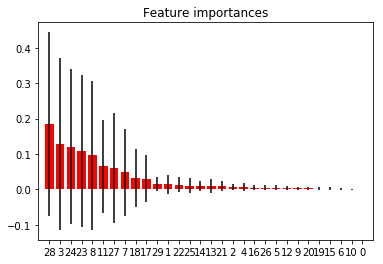

In [60]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()